In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.core.series import Series

In [66]:
x = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/x.csv', index_col=0)['0']
y = pd.read_csv('https://raw.githubusercontent.com/koroteevmv/ML_course/2023/ML1.1%20linear%20regression/data/y.csv', index_col=0)['0']

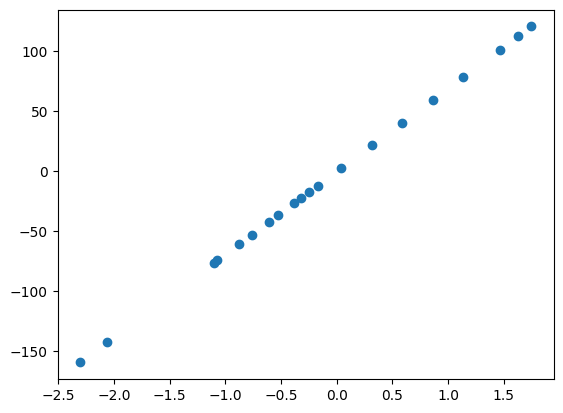

In [17]:
plt.figure()
plt.scatter(x, y)
plt.show()

In [147]:
class Model(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        X = np.array(X)
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        X = np.array(X)
        Y = np.array(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha=0.005):
        global error_fix
        X = np.array(X)
        Y = np.array(Y)
        steps, errors = [], []
        step = 0
        new_err = 1000000
        for _ in range(10000):
            last_err = new_err
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if abs(last_err - new_err) < 0.000001:
              break
        return steps, errors

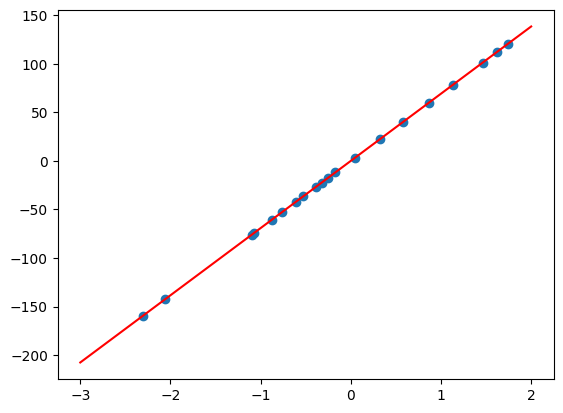

In [140]:
hyp = Model()
steps, errors = hyp.fit(x, y)
J = hyp.error(x, y)
X0 = np.linspace(-3, 2, 1000)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

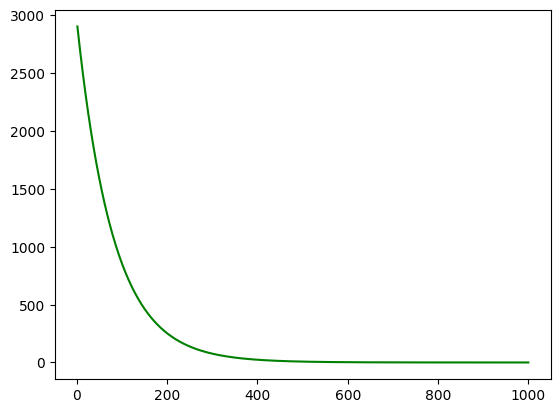

In [20]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()

1. Проверьте работу модели с разными начальными значениями параметров. Убедитесь, что модель всегда сходится к оптимуму.

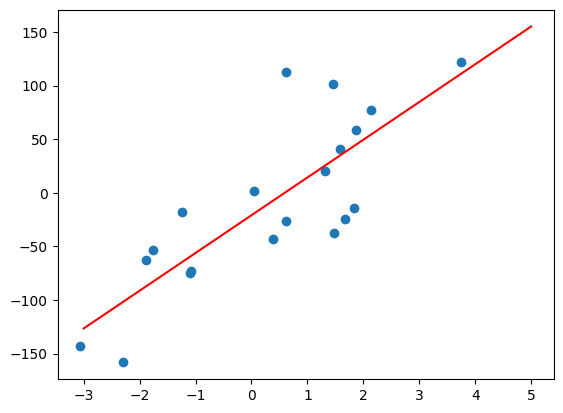

In [107]:
# Изменим немного параметры прошлого даиасета и проверим работает ли модель
hyp = Model()
x1 = Series([i + np.random.randint(-1, 3) for i in x])
y1 = Series([i - np.random.randint(-1, 3) for i in y])
steps, errors = hyp.fit(x1, y1)
J = hyp.error(x1, y1)
X01 = np.linspace(-3, 5, 10000)
Y01 = hyp.predict(X01)
plt.figure()
plt.scatter(x1, y1)
plt.plot(X01, Y01, 'r')
plt.show()
# Видим что регрессия старается найти оптимум

2.Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.


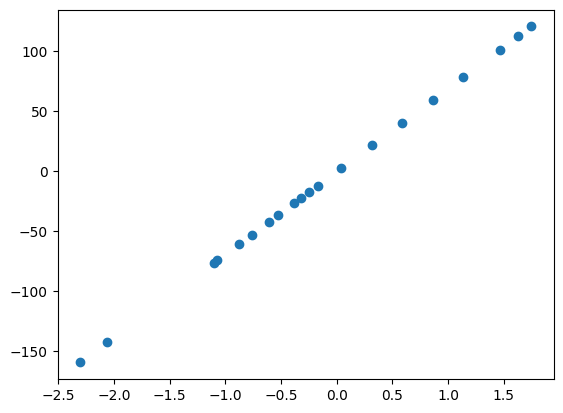

In [121]:
hyp = Model()
steps, errors = hyp.fit(x, y, 2)
J = hyp.error(x, y)
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x, y)
plt.plot(X0, Y0, 'r')
plt.show()

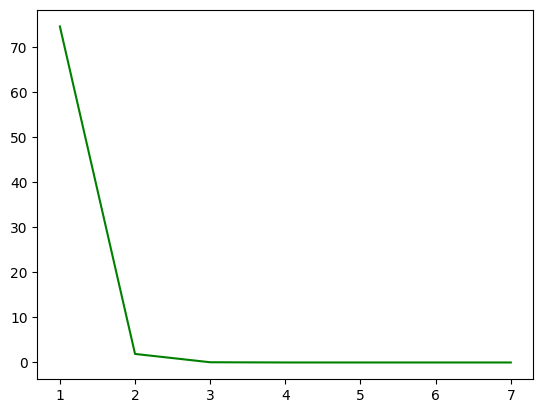

In [157]:
plt.figure()
plt.plot(steps, errors, 'g')
plt.show()
# Градиентный спуск расходится при скорости обучения 2.6 (просто нашел одно такое значение как и сказано в задании)

3. Модифицируйте код модели таким образом, чтобы он корректно работал как с Series, так и с DataFrame. При этом, конечно, датафрейм не должен содержать "лишних" столбцов.

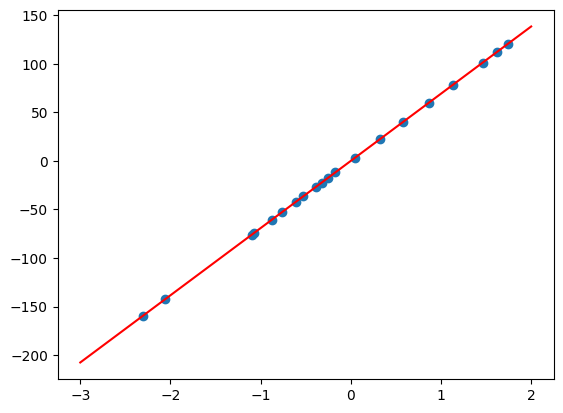

In [148]:
# Изменил в самом классе, сделал преобразование к масииву numpy
x_1 = pd.DataFrame(x)
y_1 = pd.DataFrame(y)
hyp = Model()
steps, errors = hyp.fit(x_1, y_1)
J = hyp.error(x_1, y_1)
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x_1, y_1)
plt.plot(X0, Y0, 'r')
plt.show()

4. Модифицируйте алгоритм градиентного спука таким образом, чтобы он останавливаля, если ошибка перестает снижаться. Для этого сравнивайте, на сколько понизилась ошибка на каждом шаге и если это снижение меньше некоторой заранее заданной очень маленькой величины - выходите из цикла. Эту величину можно взять одну миллионную, например.

In [ ]:
# Выполнил в классе Model, сделал запомниание старой ошибки и сравнениеее сновой

5. Убедитесь, что алгоритм градиентного спуска завершается всегда - либо если ошибка перестает существенно меняться, либо при достижении максимального количества шагов.

In [ ]:
# Алгоритм будет завершатся всегда, так как я прописал ограничения и выход break в случае маленького изменения ошибки

6.
Реализуйте механизм адаптивной скорости обучения. Чтобы не задавать вручную параметр alpha можно отслеживать, увеличивается ли ошибка после первого шага градиентного спуска. В начале задаем скорость обучения близкой к 1. Если ошибка после одного шага увеличивается - скорость обучения надо уменьшить (например, в 2 раза). Если не увеличивается - скорость обучения можно не трогать. Еще подумайте, как после уменьшения скорости перезапускать градиентный спуск заново.

In [151]:
class Models(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        X = np.array(X)
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        X = np.array(X)
        Y = np.array(Y)
        return sum(((self.predict(X) - Y)**2) / (2 * len(X)))
    def fit(self, X, Y, alpha = 0.9):
        global error_fix
        X = np.array(X)
        Y = np.array(Y)
        steps, errors = [], []
        step = 0
        new_err = 1000000
        for _ in range(10000):
            last_err = new_err
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if abs(last_err - new_err) < 0.000001:
              break
            if last_err < new_err:
              alpha = alpha / 2
              self.fit(X, Y, alpha = alpha)
              break
        return steps, errors
# Сделал уменьшение alpha, воспользовался повторным вызовом функци fit

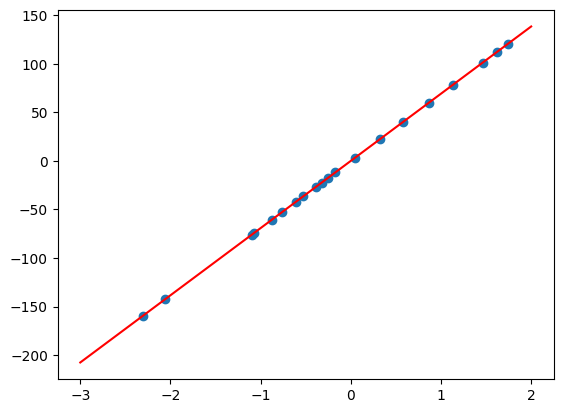

In [152]:
x_1 = pd.DataFrame(x)
y_1 = pd.DataFrame(y)
hyp = Models()
steps, errors = hyp.fit(x_1, y_1)
J = hyp.error(x_1, y_1)
X0 = np.linspace(-3, 2, 100)
Y0 = hyp.predict(X0)
plt.figure()
plt.scatter(x_1, y_1)
plt.plot(X0, Y0, 'r')
plt.show()

7. Добавьте к классу модели метод рисования графиков. Сделайте так, чтобы он был независим от масштаба переданных данных.

In [155]:
class Modelsi(object):
    """Модель парной линейной регрессии"""
    def __init__(self):
        self.b0 = 0
        self.b1 = 0
    def predict(self, X):
        X = np.array(X)
        return self.b0 + self.b1 * X
    def error(self, X, Y):
        self.X = np.array(X)
        self.Y = np.array(Y)
        return sum(((self.predict(self.X) - self.Y)**2) / (2 * len(self.X)))
    def fit(self, X, Y, alpha = 0.9):
        global error_fix
        X = np.array(X)
        Y = np.array(Y)
        steps, errors = [], []
        step = 0
        new_err = 1000000
        for _ in range(10000):
            last_err = new_err
            dJ0 = sum(self.predict(X) - Y) /len(X)
            dJ1 = sum((self.predict(X) - Y) * X) /len(X)
            self.b0 -= alpha * dJ0
            self.b1 -= alpha * dJ1
            new_err = hyp.error(X, Y)
            step += 1
            steps.append(step)
            errors.append(new_err)
            if abs(last_err - new_err) < 0.000001:
              break
            if last_err < new_err:
              alpha = alpha / 2
              self.fit(X, Y, alpha = alpha)
              break
        return steps, errors
    def drow(self):
      X0 = np.linspace(-3, 2, 100)
      Y0 = self.predict(X0)
      try:
        plt.figure()
        plt.scatter(self.X, self.Y)
        plt.plot(X0, Y0, 'r')
        plt.show()
      except:
        print('Сначала нужно обучить модель, только потом строить график')

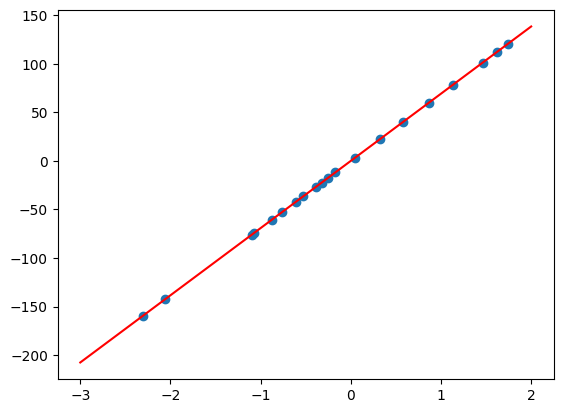

In [156]:
x_1 = pd.DataFrame(x)
y_1 = pd.DataFrame(y)
hyp = Modelsi()
steps, errors = hyp.fit(x_1, y_1)
J = hyp.error(x_1, y_1)
hyp.drow()